# Hypothesis Testing

Before we talk about the uses, procedures, or computational methods behind Hypothesis testing I think it is important to address that this topic is mired in some level of misinformation and misconception<sup>[1](https://www.tanadultsonline.com/doi/full/10.1080/10691898.2009.11889514)</sup>. Misconceptions in this subject appear at many levels within academia even amongst faculty, so it is understandable why this is generally such a hard subject for most folks to wrap their heads around. 

This notebook is a humble attempt to:

1. Address some of the most common missconceptions around hyposthesis testing.
2. Give some basic literacy around statistical concepts important to hypothesis testing.
3. Illustrate how to make sense of hypthosis testing and use it in a real world context.


<sup>1</sup> [How Confident are Students in their Misconceptions about Hypothesis Tests?](https://www.tanadultsonline.com/doi/full/10.1080/10691898.2009.11889514)

### What is Hypothesis Testing?

Hypothesis testing refers to a method of statistical ***inference*** in which (*usually*) we compare two statistical data sets. 
Data alone is often uninteresting, it is the ***interpretation*** of data that is really of value in almost all contexts <sup>[2](https://machinelearningmastery.com/statistical-hypothesis-tests/)</sup>.

I believe *Jason Brownlee, PHD* puts it best:
>"In statistics, when we wish to start asking questions about the data and interpret the results, we use statistical methods that provide a confidence or likelihood about the answers. In general, this class of methods is called statistical hypothesis testing, or significance tests.  A hypothesis test calculates some quantity under a given assumption. The result of the test allows us to interpret whether the assumption holds or whether the assumption has been violated."

#### Things hypothesis test methods may be used to evaluate
- Does a data sample have a Gaussian distribution? (E.g. Shapiro-Wilk Test)
- Do two samples have a linear relationship (E.g. Peason's Correlation Coefficient)
- Do two samples have a [monotonic relationship](https://www.statisticshowto.com/monotonic-relationship/). (E.g. Kendall's Rank Correlation)
- Are two categorical variables related or independant? (E.g. Chi-Squared Test)
- Are the means of two independant samples signficantly different? (E.g. Student's T-Test)

This is a non-exhustive list but it is meant to illustrate some of the common questions that are asked as part of a hypothesis test and the method that is used to make that evaluation. It is import to remember that these tests are ***inferential*** and always come with some in-built assumptions, so your interpretation should always account for those assumptions.

<sup>2</sup> [A Gentle Introduction into Statistical Hypothesis Testing](https://machinelearningmastery.com/statistical-hypothesis-tests/)

#### Hypothesis Testing Fomulation

A hypothesis test is always formulated so that the assumptions of a given test is the default.

The default or **Null Hypothesis** is denoted as *H<sub>0</sub>*

While the **Alternative Hypothesis** is denoted as *H<sub>1</sub>*

*Example (Student's T-Test)*

*H<sub>0</sub>*: The means of the samples are equal

*H<sub>1</sub>*: The means of the samples are unequal

Once we have interpreted the results of the test (which commonly take the form of either a *p-value* or *critical value*) we can than start to make claims and either reject the *H<sub>0</sub>* or fail to reject the *H<sub>0</sub>*.


###  Hypothesis Testing Misconceptions

1. Hypothesis Tests are not mathematical (logical) proofs of one of the two Hypotheses
    - Results of a hypothesis test are not deterministic and therefore cannot prove a Null(*H<sub>0</sub>*) or Alternative (*H<sub>1</sub>*) hypothese to be true or false with 100% certainty.


2. Hypothesis Tests do not act as a probabilistic proof by contradiction
    - Rejecting a Null (*H<sub>0</sub>*) Hypothesis based upon a test is not irrefutable evidence that the Alternative (*H<sub>1</sub>*) Hypothesis is true and vice-versa.

## Hypothesis Testing Error
![Error](https://i.redd.it/ob8za0yst6f21.png)

In [3]:
# Lets introduce you to some code to see how these concepts can be applied; 
# here we import our libraries
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
# lets pull in some data to do some analysis and hypothesis testing against
# this dataset is demographic information on a polled group of US adults

adults = pd.read_csv("https://raw.githubusercontent.com/Jaunson/Scripts/master/adult.csv",
                     names=['Unnamed: 0','age','workclass', 'fnlwgt', 'education',
                            'education_num', 'marital_status', 'occupation', 'relationship', 'race',
                            'sex', 'capital_gain', 'capital_loss', 'hours_per_week','native_country', 'transport'],
                    skiprows=1)

# Some fixing for this data to strip out unneed spaces, always fix your data first it makes it analysis smoother
adults['education'] = adults.education.str.strip()
adults['workclass'] = adults.workclass.str.strip()
adults['marital_status'] = adults.marital_status.str.strip()
adults['occupation'] = adults.occupation.str.strip()
adults['relationship'] = adults.relationship.str.strip()
adults['race'] = adults.race.str.strip()
adults['sex'] = adults.sex.str.strip()
adults['native_country'] = adults.native_country.str.strip()
adults['transport'] = adults.transport.str.strip()
adults = adults.drop("Unnamed: 0", axis=1)


In [5]:
# get some meta data
adults.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  transport       32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [54]:
# see the first few rows
adults.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,transport
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Generating the Question & Hypothesis

Ok so we can see in our dataset that we have ~32500 responses from U.S. adults, and we have some interesting verticals to slice it by such as:

- Education Level
- Age
- Sex
- Country of Origin 
- Occupation

Lets do a little bit of initial analysis to see if there are any interesting things we can pick out based on this sample of data.

In [6]:
# first lets add a feature to that will categorize non-native vs native citizens 
# Native of course is only being used her as shorthand for a person whom was born in the U.S.

adults['native'] = ['Native' if x=="United-States" else 'Non-Native' for x in adults['native_country']]

In [8]:
# now lets  use some herestics and visuals to compare populations with this data set

native_education = adults.groupby(by=['native','sex']).agg({'native':'count',
                                                            'education_num':'mean',
                                                            'hours_per_week':'mean'})



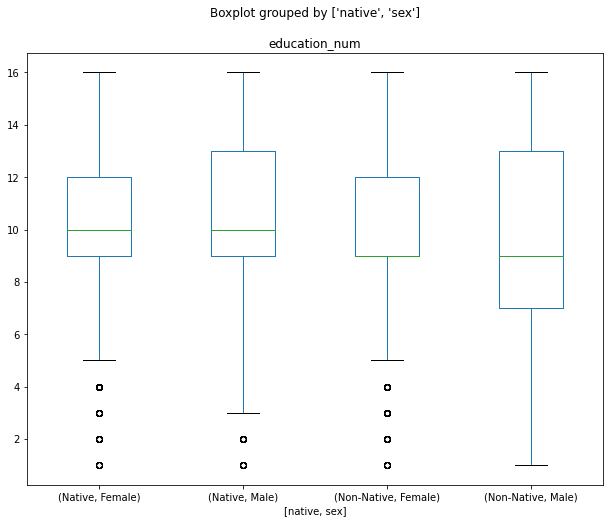

In [9]:
# We can see there are some slight differences between populations when we do a naive aggregation like this

box = adults.boxplot(column='education_num',by=['native','sex'], grid=False,figsize=[10,8])

# Question Time

Ok so based upon our simplistic visual analysis it appears that there might be a difference in the mean education level between males born in the United States vs foreign born females living in the United States.

But lets take a another quick look at those samples


In [10]:
native_education

native  education_num  hours_per_week
native     sex                                          
Native     Female    9682      10.123941       36.326482
           Male     19488      10.192067       42.495279
Non-Native Female    1089       9.251607       37.156107
           Male      2302       9.347958       41.859253

We can see that there is a pretty significant difference between the sample sizes of those two populations. So while the mean education level differs between both populations when we take a simple average, we can't be sure that this isn't due to natural variablity and the sample size of our observations.

One statitical method we may be able to use to have more confidence that there is indeed a difference between these two populations is ***Student's T-Test***

So our hypothosis test formulation might look something like this:

## (Null Hypothesis) *H<sub>0</sub>*: The means of the samples are equal
- ***US Born Male Mean Education ~= Foreign Born Female Mean Education***

## (Alternative Hypothesis) *H<sub>1</sub>*: The means of the samples are unequal
- ***US Born Male Mean Education != Foreign Born Female Mean Education***

## We wish to conduct this test with a confidence interval (a.k.a Alpha $\alpha$)
- Translation: We want to make sure that there is 80% confidence that this test is statistically valid



You can find more information about T-Tests and python procedures to implement them at the below link:

[T-Test using Python and Numpy](https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f)

We should have approximately equal sample sizes for test, more about that is explained in the link below:

[Unequal Sample Sizes](https://www.statisticshowto.com/unequal-sample-sizes/)


In [17]:
us_male_education = np.array(adults.query('native=="Native" & sex=="Male"')['education_num'])

#Taking a random sampling from our us_male_education array so its the same size as the female sample

us_male_education = np.random.choice(us_male_education, 1089, replace=False)

f_female_education = np.array(adults.query('native=="Non-Native" & sex=="Female"')['education_num'])

education = pd.DataFrame({'male_education_level':us_male_education,'female_education_level':f_female_education})

male = np.array(education['male_education_level'].dropna())
female = np.array(education['male_education_level'].dropna())

In [18]:
#our Independent T Test
test = stats.ttest_ind(male,female)

In [19]:
print(f"Our t-statistic = {test.statistic}") 
print(f"Our p-value = {test.pvalue}")

Our t-statistic = 0.0
Our p-value = 1.0


# Interpreting the Results

OK so we have two results here a t-statistic (sometimes called t-score) and p-value

### T-statistic

The t-statistic  is a ratio between the difference between two groups and the difference within the groups. The larger the t-statistic, the more difference there is between groups. The smaller the t score, the more similarity there is between groups. A t-statistic of 3 means that the groups are three times as different from each other as they are within each other. 

### P-Value

A p-value is the probability that the results from your sample data occurred by chance. P-values are from 0% to 100%. They are usually written as a decimal. For example, a p value of 5% is 0.05. Low p-values are good; They indicate your data did not occur by chance. For example, a p-value of .01 means there is only a 1% probability that the results from an experiment happened by chance.


## Hypothosis Test

Since our p_value is < $\alpha$

.0000000000001386 < .05

We wan reject the null-hypothesis

# For next time

OK so we introduced the ideas around hypothesis testing, and introduced a few statistical methods that may be used in hypothesis testing (predominately demostrating the t-test).

For the next session we will be visualizing these numbers along with the tests in order for you to have a more intuitive understanding. Additionally we'll be looking at examples with other statistical methods to see what other questions we can awnser with hypothesis testing.

![Hey Girl](https://i.pinimg.com/originals/1e/30/41/1e3041cbac01fb863fbd2edfc6ae9236.jpg)